# Activity assay

Prepared in `time_evolution/notebooks/PrepareData.ipynb`

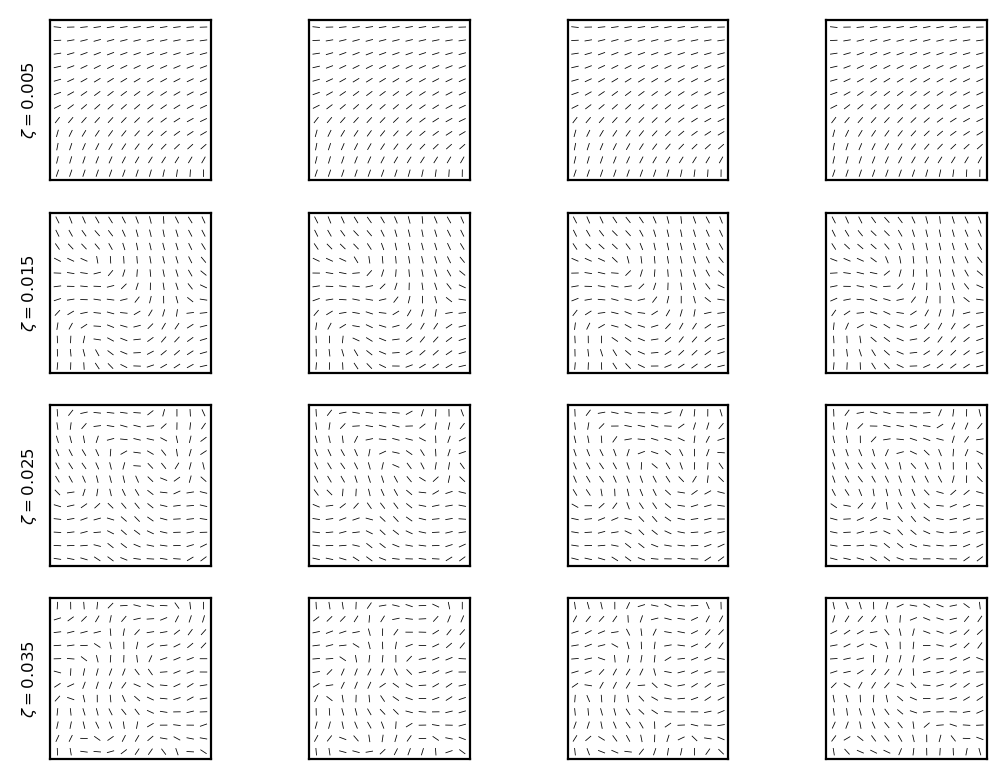

In [2]:
import sys
sys.path.insert(0, '../src')

from skimage.transform import downscale_local_mean
from scipy.interpolate import interp2d
from tqdm import tqdm
import h5py

import matplotlib.pyplot as plt
import numpy as np

activities = ['z0.005', 'z0.015', 'z0.025', 'z0.035']
fig, ax = plt.subplots(4, 4, dpi=200)

skip = 4
size = 48
slc = np.s_[:, :, 32:32+size, 32:32+size]

x2, y2 = np.meshgrid(np.linspace(0, 1, size//skip),
                     np.linspace(0, 1, size//skip))

for j, act in enumerate(activities):
    with h5py.File(f'../../data/activity_assay/{act}.hdf5', 'r') as h5f:
        director = h5f['director'][slc]

        for i in range(4):
            ax[j,i].quiver(x2, y2, 
                           director[i,0, ::skip, ::skip], 
                           director[i,1, ::skip, ::skip], 
                           pivot='middle',
                           headwidth=0, headlength=0, headaxislength=0)
            Q = np.einsum('ixy,jxy->ijxy', director[i], director[i])
            twoT = np.arctan2(Q[0, 0] - Q[1, 1], 2 * Q[0, 1])
            theta = twoT / 2
            theta[theta < 0] += np.pi
            theta[theta > np.pi] -= np.pi
            
            ax[j,i].set(xticks=[], yticks=[], aspect='equal')
        ax[j,0].set_ylabel(f'$\\zeta = {h5f.attrs["z"]:.03f}$', fontsize=6)

# Elasticity Activity Assay

['K_0.1389_Z_0.02476.hdf5' 'K_0.1279_Z_0.04932.hdf5'
 'K_0.1851_Z_0.03436.hdf5' 'K_0.1261_Z_0.01689.hdf5']
(500, 2, 48, 48)
(500, 2, 48, 48)
(500, 2, 48, 48)
(500, 2, 48, 48)


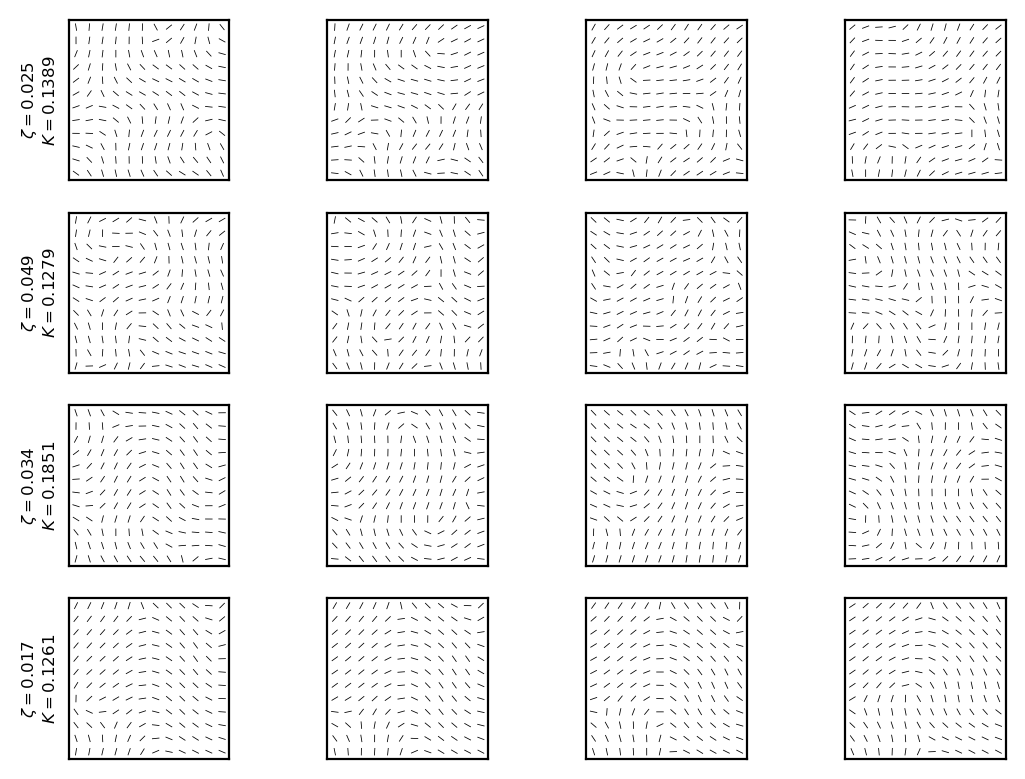

In [7]:
import sys
sys.path.insert(0, '../src')

from skimage.transform import downscale_local_mean
from scipy.interpolate import interp2d
from tqdm import tqdm
import h5py
import os

import matplotlib.pyplot as plt
import numpy as np

folders = np.random.choice(os.listdir('../../data/elastic_activity_assay'), 4)
print(folders)
fig, ax = plt.subplots(4, 4, dpi=200)

skip = 4
size = 48
slc = np.s_[:, :, 32:32+size, 32:32+size]

x2, y2 = np.meshgrid(np.linspace(0, 1, size//skip),
                     np.linspace(0, 1, size//skip))

for j, folder in enumerate(folders):
    with h5py.File(f'../../data/elastic_activity_assay/{folder}', 'r') as h5f:
        director = h5f['director'][slc]
        print(director.shape)

        for i in range(4):
            ax[j,i].quiver(x2, y2, 
                           director[i,0, ::skip, ::skip], 
                           director[i,1, ::skip, ::skip], 
                           pivot='middle',
                           headwidth=0, headlength=0, headaxislength=0)
            Q = np.einsum('ixy,jxy->ijxy', director[i], director[i])
            twoT = np.arctan2(Q[0, 0] - Q[1, 1], 2 * Q[0, 1])
            theta = twoT / 2
            theta[theta < 0] += np.pi
            theta[theta > np.pi] -= np.pi
            
            ax[j,i].set(xticks=[], yticks=[], aspect='equal')
        ax[j,0].set_ylabel(f'$\\zeta = {h5f.attrs["z"]:.03f}$\n$K = {h5f.attrs["k"]}$', fontsize=6)

In [3]:
import os
import parse
import glob

import numpy as np
import h5py
from pprint import pprint
from tqdm.auto import tqdm

def convert_folder_to_hdf5(folder, output='../data', **metadata):
    # Find the correct number of files
    num_files = len(glob.glob(f'{folder}/nx*'))
    print(f'{folder} has {num_files} timepoints')

    # Collect the data from files
    director = []
    for i in tqdm(range(1, num_files)):
        nx = np.loadtxt(f'{folder}/nx{i:d}')
        ny = np.loadtxt(f'{folder}/ny{i:d}')
        director.append(np.stack([nx, ny]))
    director = np.stack(director)

    # Save as aggregated hdf5 store
    with h5py.File(f'{output}/{os.path.basename(path)}.hdf5', 'w') as h5f:
        h5f.create_dataset('director', data=director)
        for key in metadata:
            h5f.attrs[key] = metadata[key]

fstring = 'K_{:f}_Z_{:f}'

base_dir = '/project2/vitelli/ml_active_nematics'
data_dir = 'multi_parameter_K_2d'
for path in os.listdir(f'{base_dir}/{data_dir}'):
    if os.path.isdir(f'{base_dir}/{data_dir}/{path}'):
        if os.path.exists(f'../../data/elastic_activity_assay/{path}.hdf5'):
            print(f'Skipping {path}')
            continue
        try:
            k, z = parse.parse(fstring, path)
        except:
            continue
        print(z, k, flush=True)

        print(f'Directory {path}, z = {z:.03f}, k={k:.03f}')
        convert_folder_to_hdf5(f'{base_dir}/{data_dir}/{path}', output='../../data/elastic_activity_assay', z=z, k=k)

Skipping K_0.1839_Z_0.04426
Skipping K_0.1966_Z_0.02235
Skipping K_0.09833_Z_0.03662
Skipping K_0.1265_Z_0.0287
Skipping K_0.08354_Z_0.04064
Skipping K_0.1726_Z_0.02282
Skipping K_0.1414_Z_0.02202
Skipping K_0.09017_Z_0.02994
Skipping K_0.1001_Z_0.02246
Skipping K_0.1695_Z_0.03143
Skipping K_0.1339_Z_0.03327
Skipping K_0.1751_Z_0.04443
Skipping K_0.1896_Z_0.04355
Skipping K_0.1493_Z_0.02552
Skipping K_0.1279_Z_0.04932
Skipping K_0.1998_Z_0.04231
Skipping K_0.09942_Z_0.005325
Skipping K_0.1441_Z_0.01472
Skipping K_0.1167_Z_0.03937
Skipping K_0.153_Z_0.02606
Skipping K_0.09163_Z_0.03305
Skipping K_0.1694_Z_0.03908
Skipping K_0.1248_Z_0.02505
Skipping K_0.1073_Z_0.01914
Skipping K_0.07129_Z_0.03492
Skipping K_0.1261_Z_0.01689
Skipping K_0.1708_Z_0.02099
Skipping K_0.08856_Z_0.009569
Skipping K_0.1606_Z_0.04709
Skipping K_0.1742_Z_0.0221
0.02722 0.1059
Directory K_0.1059_Z_0.02722, z = 0.027, k=0.106
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1059_Z_0.02722 has 501 timep

100%|██████████| 500/500 [00:27<00:00, 18.50it/s]


0.01404 0.1217
Directory K_0.1217_Z_0.01404, z = 0.014, k=0.122
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1217_Z_0.01404 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 19.06it/s]


0.0211 0.1088
Directory K_0.1088_Z_0.0211, z = 0.021, k=0.109
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1088_Z_0.0211 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 19.10it/s]


0.02213 0.1271
Directory K_0.1271_Z_0.02213, z = 0.022, k=0.127
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1271_Z_0.02213 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.26it/s]


0.03076 0.1917
Directory K_0.1917_Z_0.03076, z = 0.031, k=0.192
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1917_Z_0.03076 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.72it/s]


0.02476 0.1389
Directory K_0.1389_Z_0.02476, z = 0.025, k=0.139
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1389_Z_0.02476 has 501 timepoints


100%|██████████| 500/500 [00:25<00:00, 19.30it/s]


0.01074 0.07935
Directory K_0.07935_Z_0.01074, z = 0.011, k=0.079
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.07935_Z_0.01074 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.90it/s]


0.04084 0.1196
Directory K_0.1196_Z_0.04084, z = 0.041, k=0.120
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1196_Z_0.04084 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.50it/s]


0.03184 0.06902
Directory K_0.06902_Z_0.03184, z = 0.032, k=0.069
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.06902_Z_0.03184 has 501 timepoints


100%|██████████| 500/500 [00:32<00:00, 15.55it/s]


0.04711 0.1936
Directory K_0.1936_Z_0.04711, z = 0.047, k=0.194
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1936_Z_0.04711 has 501 timepoints


100%|██████████| 500/500 [00:37<00:00, 13.38it/s]


0.01917 0.1631
Directory K_0.1631_Z_0.01917, z = 0.019, k=0.163
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1631_Z_0.01917 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.38it/s]


0.04572 0.1077
Directory K_0.1077_Z_0.04572, z = 0.046, k=0.108
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1077_Z_0.04572 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.36it/s]


0.03704 0.08232
Directory K_0.08232_Z_0.03704, z = 0.037, k=0.082
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08232_Z_0.03704 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.15it/s]


0.03436 0.1851
Directory K_0.1851_Z_0.03436, z = 0.034, k=0.185
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1851_Z_0.03436 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.21it/s]


0.04287 0.1971
Directory K_0.1971_Z_0.04287, z = 0.043, k=0.197
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1971_Z_0.04287 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.23it/s]


0.02259 0.08504
Directory K_0.08504_Z_0.02259, z = 0.023, k=0.085
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08504_Z_0.02259 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.79it/s]


0.03452 0.07918
Directory K_0.07918_Z_0.03452, z = 0.035, k=0.079
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.07918_Z_0.03452 has 501 timepoints


100%|██████████| 500/500 [00:25<00:00, 19.23it/s]


0.02347 0.1044
Directory K_0.1044_Z_0.02347, z = 0.023, k=0.104
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1044_Z_0.02347 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 19.12it/s]


0.01159 0.1005
Directory K_0.1005_Z_0.01159, z = 0.012, k=0.101
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1005_Z_0.01159 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.26it/s]


0.02488 0.1421
Directory K_0.1421_Z_0.02488, z = 0.025, k=0.142
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1421_Z_0.02488 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.93it/s]


0.01451 0.1537
Directory K_0.1537_Z_0.01451, z = 0.015, k=0.154
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1537_Z_0.01451 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.37it/s]


0.03734 0.135
Directory K_0.135_Z_0.03734, z = 0.037, k=0.135
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.135_Z_0.03734 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.11it/s]


0.01353 0.1759
Directory K_0.1759_Z_0.01353, z = 0.014, k=0.176
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1759_Z_0.01353 has 501 timepoints


100%|██████████| 500/500 [00:29<00:00, 16.93it/s]


0.03832 0.1021
Directory K_0.1021_Z_0.03832, z = 0.038, k=0.102
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1021_Z_0.03832 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.32it/s]


0.007178 0.1174
Directory K_0.1174_Z_0.007178, z = 0.007, k=0.117
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1174_Z_0.007178 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.69it/s]


0.0321 0.1571
Directory K_0.1571_Z_0.0321, z = 0.032, k=0.157
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1571_Z_0.0321 has 501 timepoints


100%|██████████| 500/500 [00:28<00:00, 17.45it/s]


0.02787 0.1078
Directory K_0.1078_Z_0.02787, z = 0.028, k=0.108
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1078_Z_0.02787 has 501 timepoints


100%|██████████| 500/500 [00:30<00:00, 16.25it/s]


0.01213 0.127
Directory K_0.127_Z_0.01213, z = 0.012, k=0.127
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.127_Z_0.01213 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.24it/s]


0.04208 0.06083
Directory K_0.06083_Z_0.04208, z = 0.042, k=0.061
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.06083_Z_0.04208 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.09it/s]


0.01994 0.1964
Directory K_0.1964_Z_0.01994, z = 0.020, k=0.196
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1964_Z_0.01994 has 501 timepoints


100%|██████████| 500/500 [00:25<00:00, 19.34it/s]


0.01859 0.08962
Directory K_0.08962_Z_0.01859, z = 0.019, k=0.090
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08962_Z_0.01859 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.80it/s]


0.02168 0.1284
Directory K_0.1284_Z_0.02168, z = 0.022, k=0.128
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1284_Z_0.02168 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.47it/s]


0.03337 0.199
Directory K_0.199_Z_0.03337, z = 0.033, k=0.199
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.199_Z_0.03337 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.60it/s]


0.04506 0.08906
Directory K_0.08906_Z_0.04506, z = 0.045, k=0.089
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08906_Z_0.04506 has 501 timepoints


100%|██████████| 500/500 [00:25<00:00, 19.38it/s]


0.01441 0.1951
Directory K_0.1951_Z_0.01441, z = 0.014, k=0.195
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1951_Z_0.01441 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.66it/s]


0.0212 0.1218
Directory K_0.1218_Z_0.0212, z = 0.021, k=0.122
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1218_Z_0.0212 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 17.95it/s]


0.01892 0.1864
Directory K_0.1864_Z_0.01892, z = 0.019, k=0.186
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1864_Z_0.01892 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.28it/s]


0.02654 0.06317
Directory K_0.06317_Z_0.02654, z = 0.027, k=0.063
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.06317_Z_0.02654 has 501 timepoints


100%|██████████| 500/500 [00:29<00:00, 16.91it/s]


0.01067 0.1196
Directory K_0.1196_Z_0.01067, z = 0.011, k=0.120
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1196_Z_0.01067 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.29it/s]


0.04254 0.1487
Directory K_0.1487_Z_0.04254, z = 0.043, k=0.149
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1487_Z_0.04254 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.51it/s]


0.02988 0.1865
Directory K_0.1865_Z_0.02988, z = 0.030, k=0.186
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1865_Z_0.02988 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.93it/s]


0.02837 0.1243
Directory K_0.1243_Z_0.02837, z = 0.028, k=0.124
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1243_Z_0.02837 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.90it/s]


0.02616 0.1892
Directory K_0.1892_Z_0.02616, z = 0.026, k=0.189
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1892_Z_0.02616 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.01it/s]


0.04256 0.06577
Directory K_0.06577_Z_0.04256, z = 0.043, k=0.066
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.06577_Z_0.04256 has 501 timepoints


100%|██████████| 500/500 [00:28<00:00, 17.74it/s]


0.04781 0.1664
Directory K_0.1664_Z_0.04781, z = 0.048, k=0.166
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1664_Z_0.04781 has 501 timepoints


100%|██████████| 500/500 [00:28<00:00, 17.69it/s]


0.01276 0.08061
Directory K_0.08061_Z_0.01276, z = 0.013, k=0.081
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08061_Z_0.01276 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.23it/s]


0.006027 0.08894
Directory K_0.08894_Z_0.006027, z = 0.006, k=0.089
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.08894_Z_0.006027 has 501 timepoints


100%|██████████| 500/500 [00:28<00:00, 17.34it/s]


0.02394 0.1013
Directory K_0.1013_Z_0.02394, z = 0.024, k=0.101
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1013_Z_0.02394 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.29it/s]


0.04192 0.1251
Directory K_0.1251_Z_0.04192, z = 0.042, k=0.125
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1251_Z_0.04192 has 501 timepoints


100%|██████████| 500/500 [00:27<00:00, 18.47it/s]


0.03201 0.1608
Directory K_0.1608_Z_0.03201, z = 0.032, k=0.161
/project2/vitelli/ml_active_nematics/multi_parameter_K_2d/K_0.1608_Z_0.03201 has 501 timepoints


100%|██████████| 500/500 [00:26<00:00, 18.93it/s]
